## Shivangi Tripathi - ML - Assigment 2

### Problem Statement: 
“Who will subscribe to the term deposit?”
A Portuguese Banking Institution needs to understand which of their existing customers are most likely to invest in a term deposit. They launched a tele-marketing campaign to run an experiment on approx.. 41000 customers and analyse the differences between the ones who do opt for a TD and the ones who do not. 
Apply following classification algorithms:
*	Logistic Regression - done
*	KNN with suitable K - done
*	Decision Tree - done
*	Random Forest - done
*	AdaBoost - done
*	Gradient Boost - done
*	XGBoost

Tasks:
*	Apply data cleaning and/pre-processing techniques, if necessary.
*	Apply normalization technique, if needed, wherever applicable.
*	Check if the dataset is imbalanced. If required, apply the appropriate technique.
*	Use Hyperparameter tuning if required.
*	Compute appropriate evaluation metrics. 
*	Display confusion matrix
*	Draw ROC curve
*	Compare the performance of the models.


### Importing the relevant libraries - 

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [513]:
data = pd.read_csv(r"C:\Data_Science\Jigsaw Academy\ML\assignments\assignment_2\bank-dataset.csv", encoding='Latin')

In [514]:
data.head(3)

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   
2         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no

### Data Pre-Processing - 

In [515]:
data.sample(3)

age          job  marital            education default housing loan  \
13454   38   technician  married  professional.course      no      no   no   
28890   37  blue-collar   single             basic.9y      no      no   no   
36708   20      student   single          high.school      no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
13454  telephone   jul         wed         1    999         0  nonexistent   
28890   cellular   apr         fri         1    999         0  nonexistent   
36708   cellular   jun         fri         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
13454           1.4          93.918          -42.7      4.962       5228.1   
28890          -1.8          93.075          -47.1      1.405       5099.1   
36708          -2.9          92.963          -40.8      1.268       5076.2   

         y  
13454   no  
28890   no  
36708  yes

In [516]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* there are no null values in the dataset

In [517]:
data.empty

False

* we don't have empty dataset

In [518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [519]:
data.shape

(41188, 20)

* there are 41188 rows and 20 columns

In [520]:
data.describe()

age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251528  
min         92.201000     -50.800000      0.634000   4963.600000  
25%         93.075000     -42.700000      1.344000   5099.100000  
50%         93.749000     -41.800000      4.857000   5191.000000  
75%         93.994000     -36.400000      4.961000   5228.100000  
max         94.767000     -26.900000      5.045000   5228.100000

In [521]:
data.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [522]:
data.duplicated().sum()

2103

* there are total of 2103 duplicate rows in the data set

In [523]:
data.drop_duplicates(inplace = True)

* replacing all the duplicate rows from the dataset

In [524]:
data.shape

(39085, 20)

* after removing all the duplicates, there are now 39085 rows and 20 columns

###  Finding the Correlation between the data in the dataset -  

In [525]:
data.corr()

age  campaign     pdays  previous  emp.var.rate  \
age             1.000000  0.000900 -0.033282  0.021663      0.002358   
campaign        0.000900  1.000000  0.057151 -0.085674      0.160072   
pdays          -0.033282  0.057151  1.000000 -0.589005      0.273766   
previous        0.021663 -0.085674 -0.589005  1.000000     -0.421803   
emp.var.rate    0.002358  0.160072  0.273766 -0.421803      1.000000   
cons.price.idx  0.000690  0.129178  0.080133 -0.203464      0.776519   
cons.conf.idx   0.129442 -0.013582 -0.093710 -0.048750      0.184668   
euribor3m       0.013171  0.144320  0.300029 -0.456410      0.971847   
nr.employed    -0.014620  0.154150  0.375761 -0.503008      0.905206   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                   0.000690       0.129442   0.013171    -0.014620  
campaign              0.129178      -0.013582   0.144320     0.154150  
pdays                 0.080133      -0.093710   0.300029     0.375761  
previous             -0.203464      -0.048750  -0.456410    -0.503008  
emp.var.rate          0.776519       0.184668   0.971847     0.905206  
cons.price.idx        1.000000       0.052844   0.687278     0.519253  
cons.conf.idx         0.052844       1.000000   0.267969     0.090606  
euribor3m             0.687278       0.267969   1.000000     0.944616  
nr.employed           0.519253       0.090606   0.944616     1.000000

#### Correlation Insights - 

* From the above table, we can conclude that - 
    
    * There is a strong positive correlation between age and campaign.
    * There is a negative correlation between age and pdays.

### Understanding the data - 

In [526]:
data.head(2)

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no

In [527]:
data.drop('education', axis = 1, inplace=True)

In [528]:
data.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

* here, we have dropped the 'education' column as it is not making any difference in the dataset

In [529]:
data.head(2)

age        job  marital default housing loan    contact month day_of_week  \
0   56  housemaid  married      no      no   no  telephone   may         mon   
1   57   services  married      no      no   no  telephone   may         mon   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent           1.1          93.994   
1         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no

In [530]:
data['loan'].value_counts(dropna=True)

no     32919
yes     6166
Name: loan, dtype: int64

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

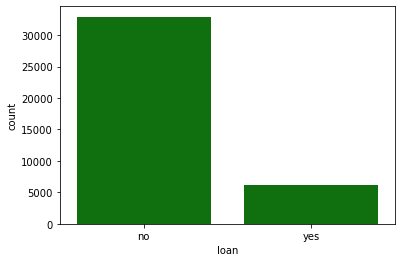

In [531]:
sns.countplot(data['loan'], color = 'green')

<AxesSubplot:xlabel='loan', ylabel='count'>

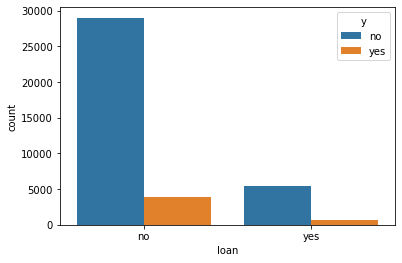

In [532]:
sns.countplot(data = data, x = 'loan', hue='y')

* as we can see from the above graph, people who have not taken the loan have higher rate of subscribing to the term deposit and people who have taken the loan have lower rate of not subscribing to the term deposit.

In [533]:
data['y'].value_counts(dropna=True)

no     34489
yes     4596
Name: y, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

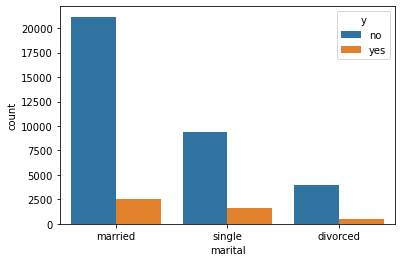

In [534]:
sns.countplot(data=data, x = 'marital', hue='y')

* customers who are married are more likely to subscribe to the Term Deposit and customers who are divorced have very less chances of subscribing to the Term Deposit.

In [535]:
data['job'].value_counts(dropna=True)

admin.           10105
blue-collar       8720
technician        6354
services          3768
management        2807
retired           1677
entrepreneur      1402
self-employed     1382
housemaid         1028
unemployed         991
student            851
Name: job, dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

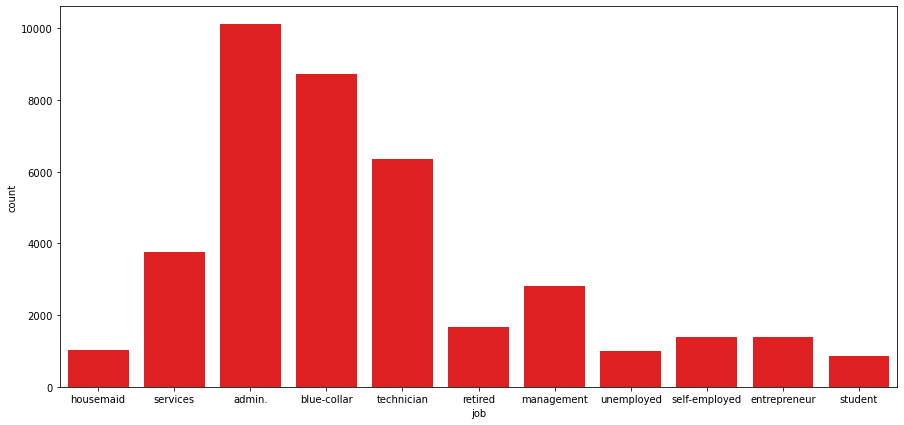

In [536]:
plt.figure(figsize = (15,7))
sns.countplot(data=data, x = 'job', color = 'red', orient='h')

* the customers belonging to the 'admin' job are the highest 
* the customers who are students are the lowest

<AxesSubplot:xlabel='job', ylabel='count'>

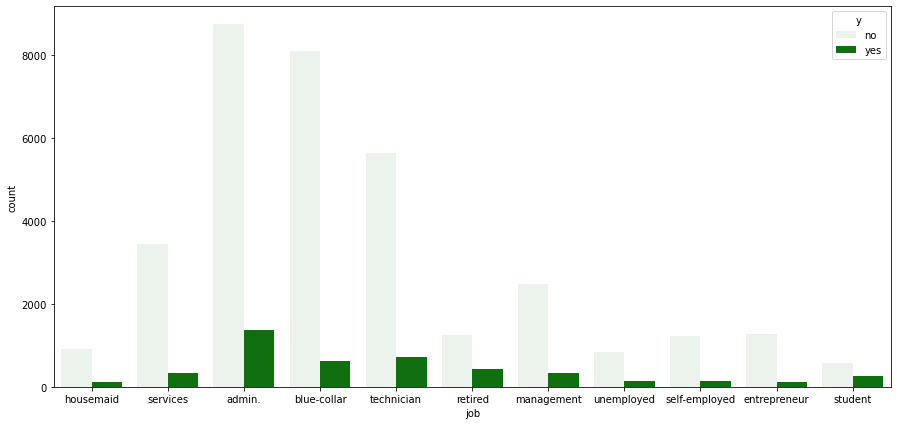

In [537]:
plt.figure(figsize = (15,7))
sns.countplot(data=data, x = 'job', color = 'green', hue = 'y' ,orient='h')

* from the above graph we can infer that - 
    * Customers with the job role as 'admin' have the highest chance of 'subscribing to a term deposit'.
    * Customers who are housemaids and unemployed have the least chance of 'subscribing to a term deposit'.

In [538]:
data['y'].value_counts(dropna=True)

no     34489
yes     4596
Name: y, dtype: int64

In [539]:
data.head(4)

age        job  marital default housing loan    contact month day_of_week  \
0   56  housemaid  married      no      no   no  telephone   may         mon   
1   57   services  married      no      no   no  telephone   may         mon   
2   37   services  married      no     yes   no  telephone   may         mon   
3   40     admin.  married      no      no   no  telephone   may         mon   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent           1.1          93.994   
1         1    999         0  nonexistent           1.1          93.994   
2         1    999         0  nonexistent           1.1          93.994   
3         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no

In [540]:
## data['education'].value_counts().sum()

In [541]:
## data[data['education'] == 'unknown'].value_counts().sum()

In [542]:
## data[data['education'] == 'basic.9y'].value_counts().sum()

In [543]:
## data['education'].value_counts(dropna=True)

### Converting all the categorical columns into numerical columns - 

In [544]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [545]:
## job - we will apply One Hot Encoding
## marital - we will apply One Hot Encoding
## education - we will apply One Hot Encoding
## default - we will apply One Hot Encoding
## housing - we will apply One Hot Encoding
## loan - we will apply One Hot Encoding
## contact - we will apply One Hot Encoding
## month - we will apply One Hot Encoding
## day_of_week - we will apply One Hot Encoding
## poutcome - we will apply One Hot Encoding
## y - we will apply Label Encoding

In [546]:
le = LabelEncoder()
oh = OneHotEncoder()

In [547]:
data1 = pd.get_dummies(data, columns = ['job','marital',
                                        'default','housing','loan','contact','month','day_of_week', 'poutcome'],drop_first=True)

In [548]:
data1.shape

(39085, 41)

In [549]:
data1.head(4)

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  no  ...          1          0   
1          -36.4      4.857       5191.0  no  ...          1          0   
2          -36.4      4.857       5191.0  no  ...          1          0   
3          -36.4      4.857       5191.0  no  ...          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0                0   
1          0          0                1                0                0   
2          0          0                1                0                0   
3          0          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                     1                 0  
1                0                     1                 0  
2                0                     1                 0  
3                0                     1                 0  

[4 rows x 41 columns]

In [550]:
le.fit(data1['y'])

LabelEncoder()

In [551]:
data1['y'] = le.fit_transform(data1['y'])

In [552]:
data1.head(4)

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  0  ...          1          0   
1          -36.4      4.857       5191.0  0  ...          1          0   
2          -36.4      4.857       5191.0  0  ...          1          0   
3          -36.4      4.857       5191.0  0  ...          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0                0   
1          0          0                1                0                0   
2          0          0                1                0                0   
3          0          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                     1                 0  
1                0                     1                 0  
2                0                     1                 0  
3                0                     1                 0  

[4 rows x 41 columns]

#### in the above table we can see that all the columns have been transformed into the numerical columns

### Splitting the data set into Training and Testing data with a division ratio of 80-20 rule - 

In [553]:
## splitting the dataset into Train-Test-Split and applying Feature Scaling after that-

In [554]:
X = data1.drop(['y'], axis = 1)

In [555]:
X.head(3)

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0          -36.4      4.857       5191.0                0  ...          1   
1          -36.4      4.857       5191.0                0  ...          1   
2          -36.4      4.857       5191.0                0  ...          1   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0          0          0          0                1                0   
1          0          0          0                1                0   
2          0          0          0                1                0   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                0                     1                 0  
1                0                0                     1                 0  
2                0                0                     1                 0  

[3 rows x 40 columns]

In [556]:
X.shape

(39085, 40)

In [557]:
y = data1['y']

In [558]:
y.head(3)

0    0
1    0
2    0
Name: y, dtype: int32

In [559]:
y.shape

(39085,)

In [560]:
data1.shape

(39085, 41)

In [561]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)

### Applying the Feature-Scaling using Standard Scaler - 

In [562]:
from sklearn.preprocessing import StandardScaler

In [563]:
X_train.shape

(31268, 40)

In [564]:
X_test.shape

(7817, 40)

In [565]:
X.shape

(39085, 40)

In [566]:
sc = StandardScaler()

In [567]:
sc.fit(X_train)

StandardScaler()

In [568]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [569]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train = pd.DataFrame(X_train, columns=X.columns)

In [570]:
X_train.head(3)

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0 -0.585737  0.831899  0.200981 -0.355570      0.848570        0.578451   
1  1.228935  0.480843  0.200981 -0.355570      0.848570        0.578451   
2 -1.063282 -0.221268  0.200981  1.609082     -1.183513       -1.175618   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0      -0.469141   0.782954     0.854423         1.861436  ...  -0.715128   
1      -0.469141   0.779512     0.854423         1.861436  ...  -0.715128   
2      -1.222436  -1.329075    -0.914718        -0.537220  ...   1.398352   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0  -0.330971  -0.135532  -0.119744        -0.512633        -0.514473   
1  -0.330971  -0.135532  -0.119744        -0.512633        -0.514473   
2  -0.330971  -0.135532  -0.119744        -0.512633        -0.514473   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success  
0        -0.488298         2.010575              0.407082         -0.190681  
1        -0.488298        -0.497370              0.407082         -0.190681  
2        -0.488298         2.010575             -2.456506         -0.190681  

[3 rows x 40 columns]

In [571]:
X_test.head(3)

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0 -0.872264  0.129788  0.200981  -0.35557      0.848570        0.578451   
1 -0.203701 -0.221268  0.200981  -0.35557      0.658063        0.708509   
2 -0.967773 -0.221268  0.200981  -0.35557      0.848570       -0.232699   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0      -0.469141   0.781233     0.854423         -0.53722  ...  -0.715128   
1       0.886790   0.721004     0.345623         -0.53722  ...   1.398352   
2       0.951358   0.782954     0.854423         -0.53722  ...  -0.715128   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0  -0.330971  -0.135532  -0.119744         1.950714        -0.514473   
1  -0.330971  -0.135532  -0.119744        -0.512633         1.943738   
2  -0.330971  -0.135532  -0.119744         1.950714        -0.514473   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success  
0        -0.488298         -0.49737              0.407082         -0.190681  
1        -0.488298         -0.49737              0.407082         -0.190681  
2        -0.488298         -0.49737              0.407082         -0.190681  

[3 rows x 40 columns]

* now all the columns are featured scaled and so the data pre-processing is completely done.

### Handling the Imbalanced Dataset using the SMOTE (Synthetic Minority Oversampling Technique) - 

In [154]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [572]:
from imblearn.over_sampling import SMOTE

In [573]:
smote = SMOTE()

In [574]:
X_train_sm, y_train_sm = smote.fit_resample(X_train.astype('float'),y_train)

In [575]:
X_train_sm.value_counts().unstack()

poutcome_success                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              -0.190681  \
age       campaign  pdays     previous  emp.var.rate cons.price.idx cons.conf.idx euribor3m nr.employed job_blue-collar job_entrepreneur job_housemaid job_management job_retired job_self-employed job_services job_student job_technician job_unemployed marital_married marital_single default_yes housing_yes loan_yes  contact_telephone month_aug month_dec month_jul month_jun month_mar month_may month_nov month_oct month_sep day_of_week_mon day_of_week_thu day_of_week_tue day_of_week_wed poutcome_nonexistent              
-2.209391 -0.572324 -4.996384  3.573735 -2.199554    -1.966233       2.931447     -1.638251 -2.033803   -0.53722        -0.193456        -0.164518     -0.27799       -0.210276   -0.192207         -0.329064     6.647178   -0.44121       -0.16037       -1.238414        1.601540      -0.007998   -1.068066    2.316664 -0.77531          -0.410918 -0.067304 -0.450591 -0.393422 -0.118362 -0.715128 -0.330971  7.378327 -0.119744 -0.512633       -0.514473        2.047931       -0.497370       -2.456506                   NaN   
          -0.221268  0.200981  1.609082 -1.882041    -2.359829       1.962925     -1.565402 -1.228775   -0.53722        -0.193456        -0.164518     -0.27799       -0.210276   -0.192207         -0.329064     6.647178   -0.44121       -0.16037       -1.238414        1.601540      -0.007998   -1.068066   -0.431655 -0.77531           2.433576 -0.067304 -0.450591 -0.393422 -0.118362 -0.715128 -0.330971 -0.135532 -0.119744 -0.512633       -0.514473       -0.488298       -0.497370       -2.456506                   1.0   
           0.129788 -4.985958  3.573735 -1.882041    -2.359829       1.962925     -1.556798 -1.228775   -0.53722        -0.193456        -0.164518     -0.27799       -0.210276   -0.192207         -0.329064     6.647178   -0.44121       -0.16037       -1.238414        1.601540      -0.007998    0.936272   -0.431655 -0.77531           2.433576 -0.067304 -0.450591 -0.393422 -0.118362 -0.715128 -0.330971 -0.135532 -0.119744 -0.512633       -0.514473       -0.488298        2.010575       -2.456506                   NaN   
-2.200225 -0.572324 -4.995983  3.536026 -2.199554    -1.966233       2.931447     -1.638251 -2.033803   -0.53722        -0.193456        -0.164518     -0.27799       -0.210276   -0.192207         -0.329064     6.647178   -0.44121       -0.16037       -1.238414        1.601540      -0.007998   -1.029595    2.263913 -0.77531          -0.410918 -0.067304 -0.450591 -0.393422 -0.118362 -0.715128 -0.330971  7.378327 -0.119744 -0.512633       -0.514473        2.047931       -0.497370       -2.456506                   NaN   
-2.190007 -0.558074 -4.995537  3.493989 -2.199554    -1.966233       2.931447     -1.638530 -2.033803   -0.53722        -0.193456        -0.164518     -0.27799       -0.210276   -0.192207         -0.329064     6.647178   -0.44121       -0.16037       -1.238414        1.601540      -0.007998   -1.068066    2.205108 -0.77531          -0.410918 -0.067304 -0.450591 -0.393422 -0.118362 -0.715128 -0.330971  7.378327 -0.119744 -0.512633       -0.514473        1.944984       -0.497370       -2.456506                   NaN   
...                                                                                                                                                                                                                                                                                                                                                

In [576]:
data1['y'].value_counts()

0    34489
1     4596
Name: y, dtype: int64

In [577]:
y_train_sm.value_counts()

0    27591
1    27591
Name: y, dtype: int64

#### we can clearly see here that by using the SMOTE technique we have now equally divided the data and so the dataset is now BALANCED

### Training of the dataset using different algorithms and getting the insights - 

#### Applying Logistic Regression - 

In [578]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,auc,cohen_kappa_score,classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [579]:
log_reg= LogisticRegression()

In [580]:
model1= log_reg.fit(X_train_sm,y_train_sm)

In [581]:
model1.coef_

array([[-6.44673618e-02, -1.92767842e-01, -2.44042861e-01,
        -1.17740725e-01, -2.53586499e+00,  1.32452801e+00,
         1.67595211e-01,  4.43391150e-01,  5.70422751e-01,
        -1.11630288e-01, -3.50688045e-02, -6.62421718e-02,
        -2.33347571e-02,  4.63617540e-02, -2.21356889e-02,
        -7.85673419e-02,  2.19726910e-02, -5.35035560e-02,
        -4.83061098e-02,  8.40068706e-02,  5.77071033e-02,
        -1.07159392e-01, -2.77298209e-02, -8.19138137e-02,
        -4.77147294e-01,  1.96894851e-01,  3.37794520e-02,
         1.50719500e-04, -2.78178271e-01,  1.79093212e-01,
        -1.79901048e-01, -1.62175651e-01,  2.31065766e-02,
         1.90385823e-02, -1.44006142e-01, -4.92774218e-02,
        -6.54013746e-02, -3.49272653e-02,  1.36018353e-01,
         1.37642488e-01]])

In [582]:
y_pred_prob1=model1.predict_proba(X_test)

In [583]:
y_pred_prob1

array([[0.66501631, 0.33498369],
       [0.74115188, 0.25884812],
       [0.71098815, 0.28901185],
       ...,
       [0.74072965, 0.25927035],
       [0.37011321, 0.62988679],
       [0.35617854, 0.64382146]])

In [584]:
y_pred_log_prob= model1.predict_log_proba(X_test)
y_pred_log_prob

array([[-0.40794372, -1.09367342],
       [-0.29954971, -1.35151379],
       [-0.34109952, -1.24128757],
       ...,
       [-0.30011956, -1.34988394],
       [-0.99394635, -0.46221517],
       [-1.03232316, -0.44033382]])

In [585]:
y_pred = model1.predict(X_test)

In [586]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [587]:
accuracy_score(y_test,y_pred)

0.8150185493155943

In [588]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


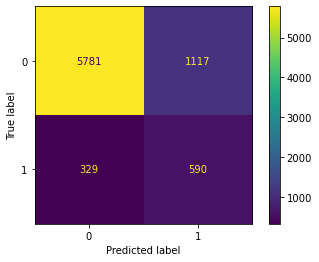

In [589]:
plot_confusion_matrix(model1,X_test,y_test)

In [590]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6898
           1       0.35      0.64      0.45       919

    accuracy                           0.82      7817
   macro avg       0.65      0.74      0.67      7817
weighted avg       0.88      0.82      0.84      7817



C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


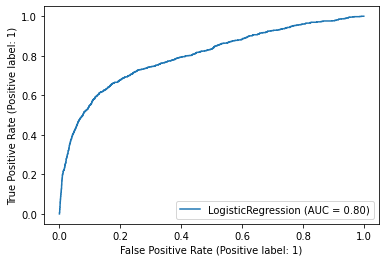

In [591]:
plot_roc_curve(model1,X_test,y_test)

In [592]:
from sklearn.metrics import roc_auc_score

In [593]:
roc_auc_score(y_test, y_pred)

0.7400355908937033

In [594]:
precision_score(y_test,y_pred)

0.3456356180433509

In [595]:
cohen_kappa_score(y_test,y_pred)

0.35000588844975977

### Logistic Regression Insight - 

* Using Logistic Regression, our accuracy is 81.5% and roc score is 74%
* Precision score is 34% which is too low
* Thus,this model is not considered as a very good model.

### Applying Decision Tree Classifier - 

In [596]:
from sklearn.tree import DecisionTreeClassifier

In [597]:
clf = DecisionTreeClassifier()

In [598]:
clf.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

In [600]:
 # yactual
y_test.head()

12726    0
1573     0
21356    0
20716    0
32215    0
Name: y, dtype: int32

In [601]:
X_test.head()

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0 -0.872264  0.129788  0.200981  -0.35557      0.848570        0.578451   
1 -0.203701 -0.221268  0.200981  -0.35557      0.658063        0.708509   
2 -0.967773 -0.221268  0.200981  -0.35557      0.848570       -0.232699   
3 -0.585737 -0.572324  0.200981  -0.35557      0.848570       -0.232699   
4  1.037917 -0.221268  0.200981  -0.35557     -1.183513       -1.175618   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0      -0.469141   0.781233     0.854423         -0.53722  ...  -0.715128   
1       0.886790   0.721004     0.345623         -0.53722  ...   1.398352   
2       0.951358   0.782954     0.854423         -0.53722  ...  -0.715128   
3       0.951358   0.784101     0.854423         -0.53722  ...  -0.715128   
4      -1.222436  -1.310720    -0.914718         -0.53722  ...   1.398352   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0  -0.330971  -0.135532  -0.119744         1.950714        -0.514473   
1  -0.330971  -0.135532  -0.119744        -0.512633         1.943738   
2  -0.330971  -0.135532  -0.119744         1.950714        -0.514473   
3  -0.330971  -0.135532  -0.119744        -0.512633        -0.514473   
4  -0.330971  -0.135532  -0.119744        -0.512633        -0.514473   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success  
0        -0.488298        -0.497370              0.407082         -0.190681  
1        -0.488298        -0.497370              0.407082         -0.190681  
2        -0.488298        -0.497370              0.407082         -0.190681  
3        -0.488298         2.010575              0.407082         -0.190681  
4        -0.488298        -0.497370              0.407082         -0.190681  

[5 rows x 40 columns]

In [602]:
# ypredicted
ypred_dec_classifier = clf.predict(X_test) # 
ypred2 = pd.DataFrame(ypred_dec_classifier)# predicted data
ypred2.head(20)

0
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   1
9   1
10  0
11  1
12  0
13  0
14  0
15  0
16  0
17  0
18  0
19  0

In [603]:
ypred_dec_classifier

array([0, 0, 0, ..., 0, 1, 0])

In [604]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,plot_confusion_matrix

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


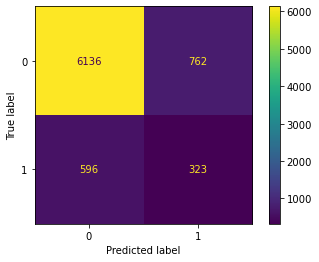

In [606]:
# confusion matrix
plot_confusion_matrix(clf,X_test,y_test)
# TP - 1,1--- 323
# TN - 0,0 -- 6136
# FP - 0,1 ---762
# FN - 1,0 -- 596

In [607]:
accuracy_score(y_test,ypred_dec_classifier)

0.8262760649865677

In [609]:
precision_score(y_test,ypred_dec_classifier)

0.2976958525345622

In [610]:
recall_score(y_test,ypred_dec_classifier)

0.3514689880304679

In [612]:
from sklearn.tree import plot_tree

In [614]:
## plot_tree(clf)

#### -- Hyperparameter tuning - 

In [615]:
clf1 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)

In [616]:
clf1.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [624]:
y_pred_3 = clf1.predict(X_test)

In [625]:
list(X_train_sm.columns.values)

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

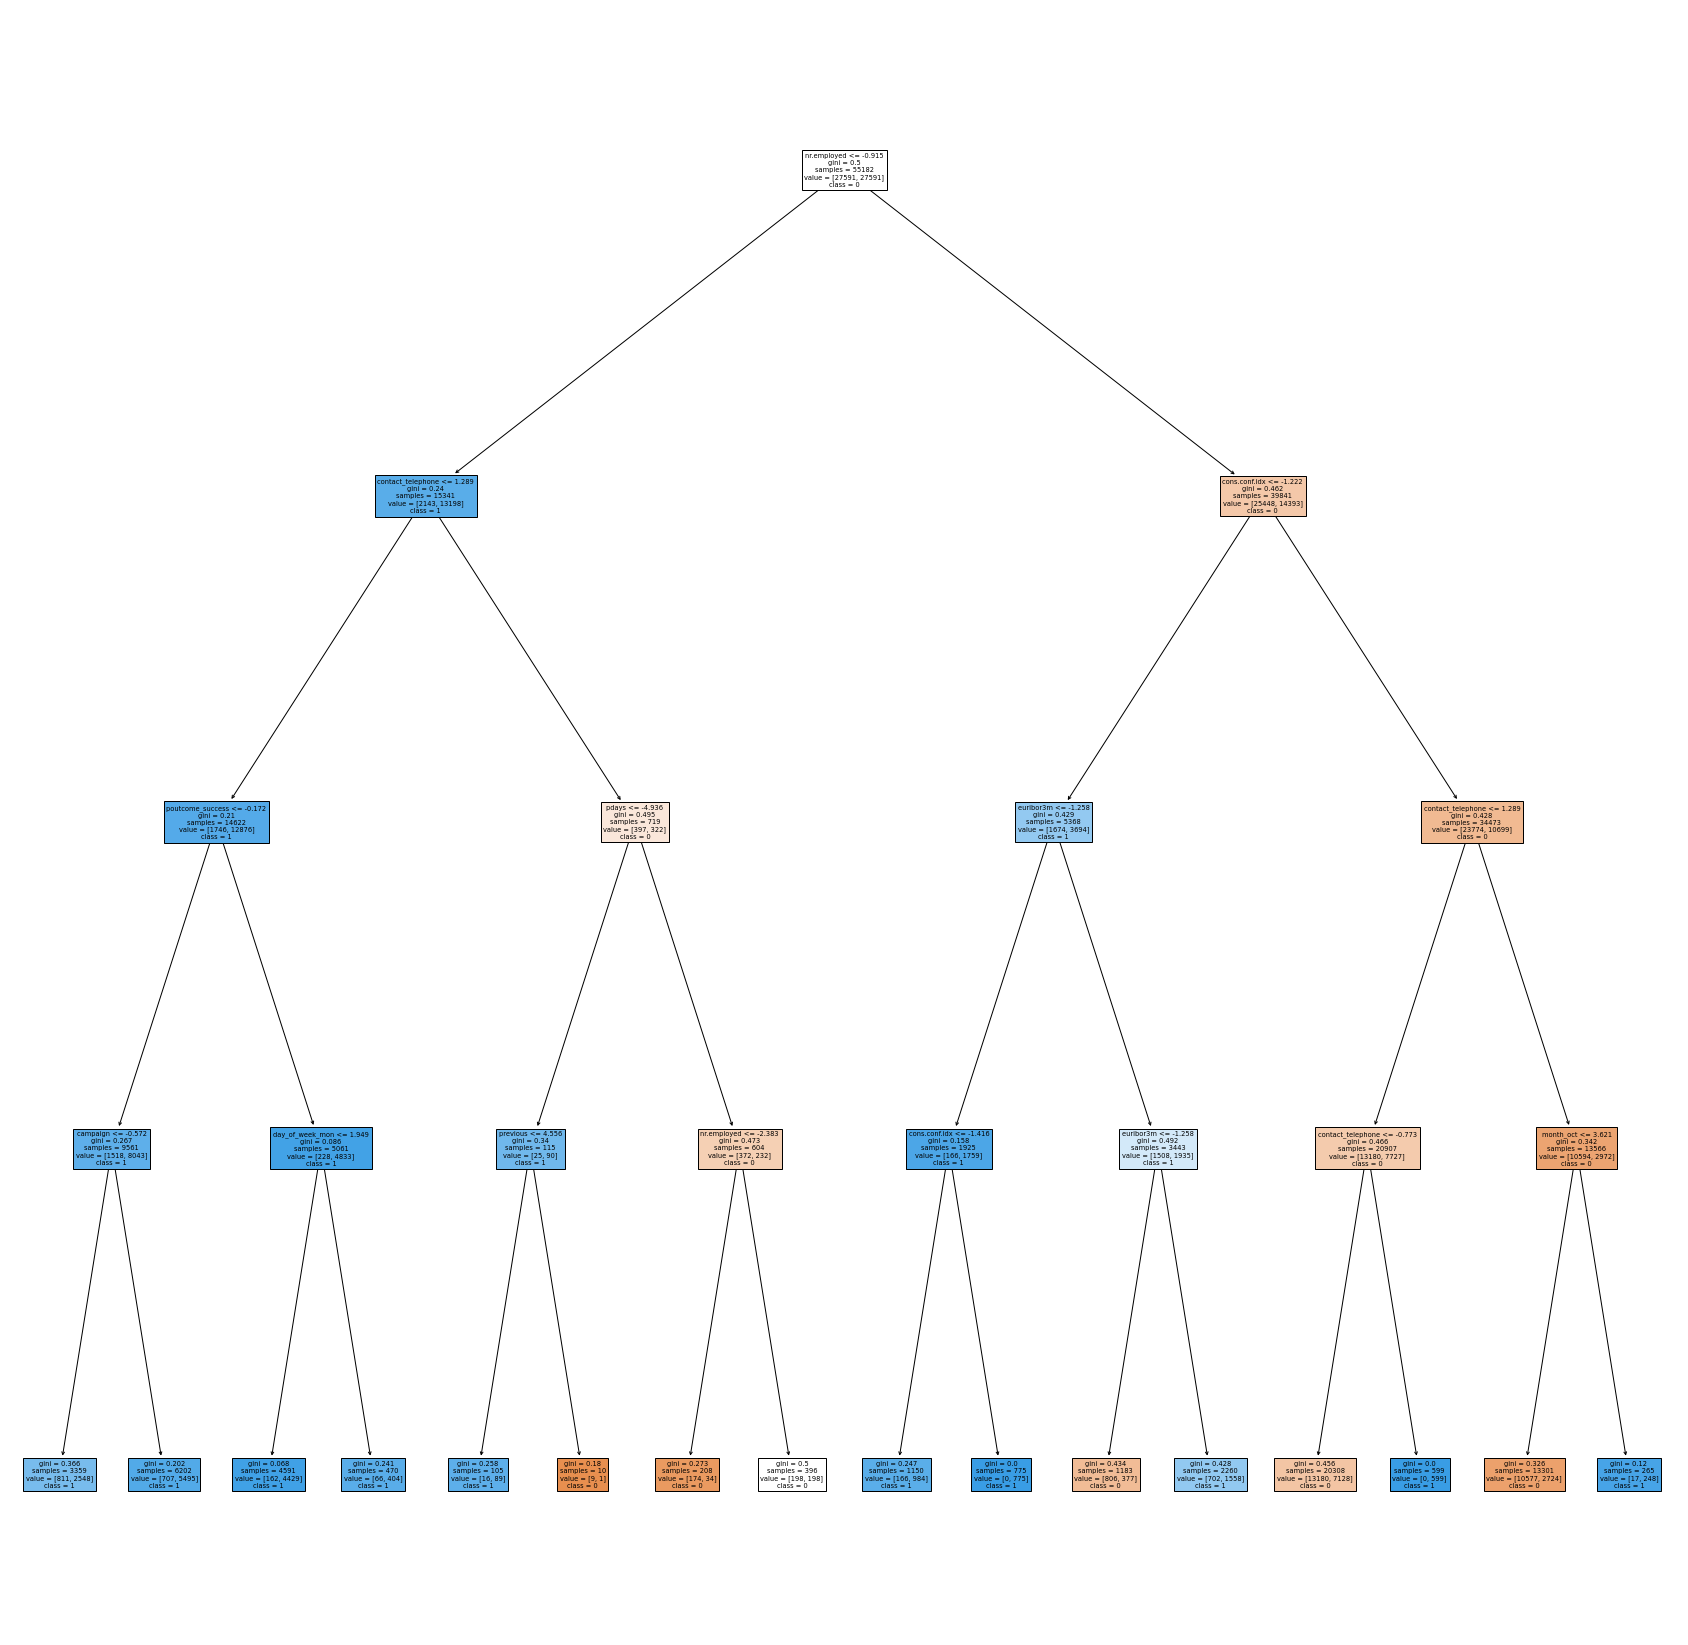

In [626]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(clf1,feature_names=list(X_train_sm.columns.values),class_names=['0','1'],filled=True);

In [627]:
treerules = tree.export_text(clf1,feature_names=list(X_train_sm.columns.values))
print(treerules)

|--- nr.employed <= -0.91
|   |--- contact_telephone <= 1.29
|   |   |--- poutcome_success <= -0.17
|   |   |   |--- campaign <= -0.57
|   |   |   |   |--- class: 1
|   |   |   |--- campaign >  -0.57
|   |   |   |   |--- class: 1
|   |   |--- poutcome_success >  -0.17
|   |   |   |--- day_of_week_mon <= 1.95
|   |   |   |   |--- class: 1
|   |   |   |--- day_of_week_mon >  1.95
|   |   |   |   |--- class: 1
|   |--- contact_telephone >  1.29
|   |   |--- pdays <= -4.94
|   |   |   |--- previous <= 4.56
|   |   |   |   |--- class: 1
|   |   |   |--- previous >  4.56
|   |   |   |   |--- class: 0
|   |   |--- pdays >  -4.94
|   |   |   |--- nr.employed <= -2.38
|   |   |   |   |--- class: 0
|   |   |   |--- nr.employed >  -2.38
|   |   |   |   |--- class: 0
|--- nr.employed >  -0.91
|   |--- cons.conf.idx <= -1.22
|   |   |--- euribor3m <= -1.26
|   |   |   |--- cons.conf.idx <= -1.42
|   |   |   |   |--- class: 1
|   |   |   |--- cons.conf.idx >  -1.42
|   |   |   |   |--- class: 1
|   

In [628]:
feat_imp = clf1.feature_importances_
pd.Series(feat_imp,index=list(X_train_sm.columns.values)).sort_values(ascending=False)

nr.employed             0.615337
cons.conf.idx           0.149197
contact_telephone       0.124178
euribor3m               0.057560
month_oct               0.030803
poutcome_success        0.009493
campaign                0.007851
pdays                   0.003403
previous                0.001132
day_of_week_mon         0.001045
month_mar               0.000000
month_aug               0.000000
month_dec               0.000000
month_jul               0.000000
month_jun               0.000000
day_of_week_wed         0.000000
month_may               0.000000
poutcome_nonexistent    0.000000
month_sep               0.000000
loan_yes                0.000000
day_of_week_thu         0.000000
day_of_week_tue         0.000000
month_nov               0.000000
age                     0.000000
housing_yes             0.000000
default_yes             0.000000
marital_married         0.000000
job_unemployed          0.000000
job_technician          0.000000
job_student             0.000000
job_servic

In [629]:
accuracy_score(y_test,y_pred_3)

0.8587693488550595

In [630]:
precision_score(y_test,y_pred_3)

0.4231088944305902

#### Applying the GridSearch Algorithm for choosing best parameters (Hyperparameter Selection) - 

In [640]:
from sklearn.model_selection import GridSearchCV

In [641]:
mod = GridSearchCV(clf,param_grid = {'max_depth':[i for i in range(7,11)],'max_leaf_nodes':[i for i in range(5,11)],'min_samples_leaf':[i for i in range(10,100,5)]},cv=10)

In [642]:
mod.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95]})

In [643]:
mod.best_score_

0.7780083117263168

In [644]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=10)

In [645]:
clf_grid = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=10)
clf_grid.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=10)

In [646]:
y_pred_grid= clf_grid.predict(X_test)

In [650]:
accuracy_score(y_test,y_pred_grid)

0.8381732122297557

In [651]:
precision_score(y_test, y_pred_grid)

0.3753602305475504

#### Decision Tree Classifier Insights - 

* The accuracy score of the Decision Tree Classifier model before applying the Hyperparameter tuning is 82%
* The accuracy score of the Decision Tree Classifier model after applying the Hyperpapramter tuning is 85.8%
* Upon applying the Grid Search CV algorithm the accuracy score is 83.8% which is very close. 
* Thus this can be considered a good model.
* The best score is 77%.

### Bagging - Random Forest Classifier - 

In [652]:
from sklearn.ensemble import BaggingClassifier

In [653]:
bgc = BaggingClassifier(n_estimators=20,oob_score=True,base_estimator=DecisionTreeClassifier())

In [654]:
bgc.fit(X_train_sm,y_train_sm)

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  oob_score=True)

In [655]:
bgc.oob_score_

0.9209162408031605

In [657]:
ypred4 = bgc.predict(X_test)

In [658]:
ypred4

array([0, 0, 0, ..., 0, 0, 0])

In [659]:
accuracy_score(y_test,ypred4)

0.870026864526033

In [660]:
ls = []
for i in range(20,300,10):
    bgc = BaggingClassifier(n_estimators=i,oob_score=True,base_estimator=DecisionTreeClassifier())
    bgc.fit(X_train_sm,y_train_sm)
    oob = bgc.oob_score_
    print(f'For n_estimators:{i}, OOB_score is {oob}')
    ls.append((oob,i))

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


For n_estimators:20, OOB_score is 0.9205900474792504
For n_estimators:30, OOB_score is 0.9234714218404553
For n_estimators:40, OOB_score is 0.9254467036352434
For n_estimators:50, OOB_score is 0.9262259432423616
For n_estimators:60, OOB_score is 0.9265158928636149
For n_estimators:70, OOB_score is 0.9262078213910333
For n_estimators:80, OOB_score is 0.9273494980247182
For n_estimators:90, OOB_score is 0.9276938131999565
For n_estimators:100, OOB_score is 0.9276032039433149
For n_estimators:110, OOB_score is 0.9276213257946432
For n_estimators:120, OOB_score is 0.9274401072813598
For n_estimators:130, OOB_score is 0.9274944728353448
For n_estimators:140, OOB_score is 0.9279837628212099
For n_estimators:150, OOB_score is 0.9277844224565982
For n_estimators:160, OOB_score is 0.9280743720778515
For n_estimators:170, OOB_score is 0.9280743720778515
For n_estimators:180, OOB_score is 0.9279475191185531
For n_estimators:190, OOB_score is 0.9281468594831648
For n_estimators:200, OOB_score is 0

In [661]:
max(ls)

(0.9290710739009097, 240)

In [662]:
clf3 = BaggingClassifier(n_estimators=240,oob_score=True,base_estimator=DecisionTreeClassifier())

In [663]:
clf3.fit(X_train_sm,y_train_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=240,
                  oob_score=True)

In [664]:
ypred5 = clf3.predict(X_test)

In [665]:
accuracy_score(y_test,ypred5)

0.8715619802993476

In [666]:
precision_score(y_test,ypred5)

0.44170096021947874

In [667]:
recall_score(y_test,ypred5)

0.35038084874863984

In [668]:
imp= []
for i in clf3.estimators_:
    imp.append(i.feature_importances_)

In [669]:
feat_imp = np.mean(imp,axis=0)
feat_imp

array([0.09324746, 0.26626621, 0.00682339, 0.00785777, 0.00404083,
       0.00899851, 0.05406705, 0.09161294, 0.20449434, 0.01368396,
       0.00313599, 0.00247602, 0.00597902, 0.00347654, 0.0033676 ,
       0.00643206, 0.00247622, 0.01067471, 0.00243453, 0.01524049,
       0.01164966, 0.        , 0.04393863, 0.01466   , 0.04284447,
       0.00159736, 0.00044653, 0.00279209, 0.00164081, 0.00040621,
       0.00172818, 0.00192289, 0.010737  , 0.00084963, 0.01449453,
       0.01057342, 0.0113989 , 0.01275984, 0.00586844, 0.00290575])

In [670]:
pd.DataFrame({'features':X_train_sm.columns,'Feat_Importance':feat_imp}).sort_values(by='Feat_Importance',ascending=False)

features  Feat_Importance
1               campaign         0.266266
8            nr.employed         0.204494
0                    age         0.093247
7              euribor3m         0.091613
6          cons.conf.idx         0.054067
22           housing_yes         0.043939
24     contact_telephone         0.042844
19       marital_married         0.015240
23              loan_yes         0.014660
34       day_of_week_mon         0.014495
9        job_blue-collar         0.013684
37       day_of_week_wed         0.012760
20        marital_single         0.011650
36       day_of_week_tue         0.011399
32             month_oct         0.010737
17        job_technician         0.010675
35       day_of_week_thu         0.010573
5         cons.price.idx         0.008999
3               previous         0.007858
2                  pdays         0.006823
15          job_services         0.006432
12        job_management         0.005979
38  poutcome_nonexistent         0.005868
4           emp.var.rate         0.004041
13           job_retired         0.003477
14     job_self-employed         0.003368
10      job_entrepreneur         0.003136
39      poutcome_success         0.002906
27             month_jul         0.002792
16           job_student         0.002476
11         job_housemaid         0.002476
18        job_unemployed         0.002435
31             month_nov         0.001923
30             month_may         0.001728
28             month_jun         0.001641
25             month_aug         0.001597
33             month_sep         0.000850
26             month_dec         0.000447
29             month_mar         0.000406
21           default_yes         0.000000

In [671]:
from sklearn.ensemble import RandomForestClassifier

In [672]:
ls = []
for i in range(50,350,10):
    bgc = RandomForestClassifier(n_estimators=i,oob_score=True)
    bgc.fit(X_train_sm,y_train_sm)
    oob = bgc.oob_score_
    print(f'For n_estimators:{i}, OOB_score is {oob}')
    ls.append((oob,i))

For n_estimators:50, OOB_score is 0.9307020405204596
For n_estimators:60, OOB_score is 0.9310825993983546
For n_estimators:70, OOB_score is 0.9310101119930412
For n_estimators:80, OOB_score is 0.9318980827081295
For n_estimators:90, OOB_score is 0.9318980827081295
For n_estimators:100, OOB_score is 0.9326773223152477
For n_estimators:110, OOB_score is 0.9318799608568011
For n_estimators:120, OOB_score is 0.9318255953028162
For n_estimators:130, OOB_score is 0.9322061541807111
For n_estimators:140, OOB_score is 0.9325323475046211
For n_estimators:150, OOB_score is 0.9325867130586061
For n_estimators:160, OOB_score is 0.9320974230727411
For n_estimators:170, OOB_score is 0.933293465260411
For n_estimators:180, OOB_score is 0.932695444166576
For n_estimators:190, OOB_score is 0.9326229567612627
For n_estimators:200, OOB_score is 0.933021637490486
For n_estimators:210, OOB_score is 0.9327860534232177
For n_estimators:220, OOB_score is 0.932858540828531
For n_estimators:230, OOB_score is 0.

In [685]:
max(ls)

(0.9333840745170526, 230)

In [686]:
bgc = RandomForestClassifier(n_estimators=200,oob_score=True)

In [689]:
bgc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(n_estimators=200, oob_score=True)

In [690]:
ypred6 = bgc.predict(X_test)

In [691]:
accuracy_score(y_test,ypred6)

0.8714340539849047

#### Bagging - Random Forest Classifier Insights - 

* On applying the Bagging classifier, the accuracy score is 87.00%
* On selecting the best estimator, the accuracy score is 82.15% and precision score is 44%
    * Thus we can conclude that Random Forest is better than Decision Tree classifier (82% and after hyperparameter pruning 85%).

### Applying AdaBoost Classifier - 

In [696]:
from sklearn.ensemble import AdaBoostClassifier

In [697]:
adc = AdaBoostClassifier(n_estimators=100)

In [698]:
adc.fit(X_train_sm,y_train_sm)

AdaBoostClassifier(n_estimators=100)

In [699]:
ypred7 = adc.predict(X_test)

In [700]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,plot_confusion_matrix

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


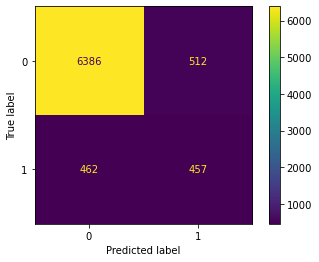

In [701]:
plot_confusion_matrix(adc,X_test,y_test)

In [702]:
print(classification_report(y_test,ypred7))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6898
           1       0.47      0.50      0.48       919

    accuracy                           0.88      7817
   macro avg       0.70      0.71      0.71      7817
weighted avg       0.88      0.88      0.88      7817



In [703]:
accuracy_score(y_test,ypred7)

0.875399769732634

In [704]:
precision_score(y_test,ypred7)

0.4716202270381837

#### AdaBoost Classifier Insights - 

* On applying the AdaBoost classifier the accuracy score is 87.5% which is above RandomForest Classifier, Decision Tree Classifier and Logistic Regression
* The precision score is 47.16%.

### Applying Gradient Boosting - 

In [705]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [706]:
from sklearn.ensemble import GradientBoostingRegressor

In [707]:
gbr = GradientBoostingRegressor()

In [708]:
gbr.fit(X_train_sm,y_train_sm)

GradientBoostingRegressor()

In [709]:
ypred8 = gbr.predict(X_test)

In [710]:
ypred_train = gbr.predict(X_train_sm)

In [711]:
r2_score(y_train_sm,ypred_train)

0.648434824430443

In [712]:
r2_score(y_test,ypred8)

0.05159670314774134

In [713]:
mean_squared_error(y_test,ypred8)

0.09839012957428821

In [717]:
mod2 = RandomizedSearchCV(gbr,{'n_estimators':[i for i in range(100,250,10)],'learning_rate':[0.1,0.2,0.3,0.4,0.5],'max_depth':range(3,12)},cv=10)

In [718]:
mod2.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': range(3, 12),
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240]})

In [719]:
mod2.best_score_

0.16992129263000758

In [720]:
mod2.best_params_

{'n_estimators': 160, 'max_depth': 5, 'learning_rate': 0.2}

In [721]:
ypred9 = mod2.predict(X_test)

In [727]:
r2_score(y_test,ypred9)

0.05159670314774134

#### Gradient Boosting Insights - 

* This is not a good model as the R-squared score and the best score are very low.

# KNN with suitable k -

In [728]:
knn = KNeighborsClassifier()

In [729]:
tuned_parameters = {'n_neighbors':range(3,20,2), 'metric': ['euclidean', 'minkowski']}

In [730]:
clf_knn = GridSearchCV(knn,tuned_parameters, cv = 10, scoring = 'roc_auc')

In [731]:
clf_knn.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(3, 20, 2)},
             scoring='roc_auc')

In [733]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [734]:
clf_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [736]:
clf_knn.best_score_

0.929861529400398

In [737]:
from sklearn.model_selection import KFold

In [738]:
clf_knn1 = KNeighborsClassifier(metric='euclidean', n_neighbors= 5)

In [739]:
clf_knn1.fit(X_train_sm,y_train_sm)
y_pred10 = clf_knn1.predict(X_test)

In [741]:
precision_score(y_test,y_pred10)

0.2635

In [742]:
accuracy_score(y_test,y_pred10)

0.7614174235640271

### Conclusion and the understanding - 

* The actual dataset consisted of 41188 rows and 20 columns

* It also contained 2103 duplicates

* After removing all the duplicates from the actual dataset, the total total number of 39085 rows are and the total number of columns are 20.

* Column name 'education' was dropped as it did not made any impact on the target column ('y').

* In the Data Pre-Processing part - 
   
    * All the categorical columns are converted into the numerical columns using 'One-Hot Encoding' and 'Label Encoding'
    * Feature scaling is also done using 'StandardScaler()'
    * Using the SMOTE technique, the Imbalanced data is transformed into the Balanced data set.

* The given data set is divided into 80-20 ratio wherein the training data is 80% of the original dataset and testing data is 20% for the same.

* Now, the algorithms used to train the model are as mentioned below along with their performance metrics - 
    
    * Logistic Regression - 
        * Using Logistic Regression, our accuracy is 81.5% and roc score is 74%
        * Precision score is 34% which is too low
    Thus,this model is not considered as a very good model.
        
    * Decision Tree Classifier - 
        * The accuracy score of the Decision Tree Classifier model before applying the Hyperparameter tuning is 82%
        * The accuracy score of the Decision Tree Classifier model after applying the Hyperpapramter tuning is 85.8%
        * Upon applying the Grid Search CV algorithm the accuracy score is 83.8% which is very close.
        * The best score is 77%.
    * Thus this can be considered a good model.

    * Bagging - Random Forest Classifier - 
        * On applying the Bagging classifier, the accuracy score is 87.00%
        * On selecting the best estimator, the accuracy score is 82.15% and precision score is 44%
    * Thus we can conclude that Random Forest is better than Decision Tree classifier (82% and after hyperparameter pruning 85%)
    
    * AdaBoost - 
        * On applying the AdaBoost classifier the accuracy score is 87.5% which is above RandomForest Classifier, Decision Tree Classifier and Logistic Regression
        * The precision score is 47.16%.
    
    * Gradient Boost - 
        * This is not a good model as the R-suqared score and the best score ar very low.
    
    * KNN with sutiable k - 
        * The accuracy score of KNN algorithm is 93% which is very good. 
    * Thus this model is a very good model and can be used for predicting the outcome.
    
* Thus, it can be concluded that amongst all the algorithms applied to the model, the best performance is calculated by the 'KNN' model with the accuracy score of 93%.

## Thus, it can be concluded that amongst all the algorithms applied to the model, the best performance is calculated by the 'KNN' model with the accuracy score of 93%.

### End of the assignment, thank you.